## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from functools import partial
from itertools import count
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
import string
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold,KFold
from sklearn.svm import LinearSVC,SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
%matplotlib inline

/Users/francescoperera/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Train Folders

In [2]:
descriptionTrainFolder = "/Users/francescoperera/Desktop/data/descriptions_train"
featuresTrainFolder = "/Users/francescoperera/Desktop/data/features_train"
imagesTrainFolder = "/Users/francescoperera/Desktop/data/images_train"
tagsTrainFolder = "/Users/francescoperera/Desktop/data/tags_train"

## Test Folders

In [3]:
descriptionTestFolder = "/Users/francescoperera/Desktop/data/descriptions_test"
featuresTestFolder = "/Users/francescoperera/Desktop/data/features_test"
imagesTestFolder = "/Users/francescoperera/Desktop/data/images_test"
tagsTestFolder = "/Users/francescoperera/Desktop/data/tags_test"

## Number of files

In [4]:
numTrain = 10000
numTest = 2000

## Read Files

In [5]:
def readTagsFile(fileName):
    tags = []
    f = open(fileName,"r")
    for line in f:
        line = line.split(":") # possibly also consider using the keys in each line(vehicle,outdoor etc..)
        tag = line[-1].replace("\n","")
        tags.append(tag)
    return tags

def readDescriptionFile(fileName):
    desc = []
    f = open(fileName,"r")
    for line in f:
        noPuncSentence = stripPunctuation(line)
        desc.append(noPuncSentence)
    return desc

def stripPunctuation(s):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    return regex.sub(' ', s)

In [6]:
for s in readDescriptionFile(descriptionTrainFolder+"/" + str(0) + ".txt"):
    print tokenize(s)


NameError: name 'tokenize' is not defined

## Tags Analysis

In [7]:
def getTagDict(num,tagFolder):
    tags = {}
    for n in range(num):
        f = tagFolder +"/" + str(n) + ".txt"
        fileTags = readTagsFile(f)
        #newTags = stemTags(fileTags)
        for tag in fileTags:
            if str(tag) not in tags.keys():
                tags[str(tag)] = 0
            else:
                tags[str(tag)] +=1
    return tags

In [8]:
tagDict = getTagDict(numTrain,tagsTrainFolder)

In [9]:

print tagDict

{'toilet': 287, 'fire hydrant': 151, 'sports ball': 339, 'bicycle': 284, 'kite': 200, 'laptop': 303, 'potted plant': 356, 'tennis racket': 293, 'teddy bear': 183, 'donut': 117, 'snowboard': 128, 'carrot': 138, 'motorcycle': 327, 'oven': 246, 'keyboard': 169, 'scissors': 72, 'chair': 1029, 'couch': 344, 'mouse': 158, 'airplane': 221, 'boat': 276, 'apple': 106, 'sheep': 122, 'horse': 218, 'sandwich': 207, 'banana': 169, 'cup': 746, 'tv': 351, 'backpack': 428, 'toaster': 23, 'bowl': 592, 'microwave': 112, 'bench': 475, 'book': 446, 'elephant': 178, 'orange': 130, 'tie': 305, 'stop sign': 141, 'knife': 331, 'pizza': 265, 'fork': 267, 'hair drier': 11, 'frisbee': 194, 'umbrella': 357, 'parking meter': 57, 'bus': 330, 'suitcase': 188, 'bear': 86, 'vase': 310, 'toothbrush': 79, 'spoon': 292, 'train': 330, 'sink': 389, 'wine glass': 214, 'handbag': 597, 'cell phone': 436, 'bird': 305, 'broccoli': 162, 'refrigerator': 204, 'remote': 239, 'surfboard': 321, 'cow': 177, 'dining table': 959, 'hot d

In [10]:
print list(tagDict.keys())

['toilet', 'fire hydrant', 'sports ball', 'bicycle', 'kite', 'laptop', 'potted plant', 'tennis racket', 'teddy bear', 'donut', 'snowboard', 'carrot', 'motorcycle', 'oven', 'keyboard', 'scissors', 'chair', 'couch', 'mouse', 'airplane', 'boat', 'apple', 'sheep', 'horse', 'sandwich', 'banana', 'cup', 'tv', 'backpack', 'toaster', 'bowl', 'microwave', 'bench', 'book', 'elephant', 'orange', 'tie', 'stop sign', 'knife', 'pizza', 'fork', 'hair drier', 'frisbee', 'umbrella', 'parking meter', 'bus', 'suitcase', 'bear', 'vase', 'toothbrush', 'spoon', 'train', 'sink', 'wine glass', 'handbag', 'cell phone', 'bird', 'broccoli', 'refrigerator', 'remote', 'surfboard', 'cow', 'dining table', 'hot dog', 'car', 'clock', 'skateboard', 'dog', 'bed', 'cat', 'person', 'skis', 'giraffe', 'truck', 'bottle', 'baseball bat', 'cake', 'baseball glove', 'traffic light', 'zebra']


In [11]:
print list(tagDict.values())

[287, 151, 339, 284, 200, 303, 356, 293, 183, 117, 128, 138, 327, 246, 169, 72, 1029, 344, 158, 221, 276, 106, 122, 218, 207, 169, 746, 351, 428, 23, 592, 112, 475, 446, 178, 130, 305, 141, 331, 265, 267, 11, 194, 357, 57, 330, 188, 86, 310, 79, 292, 330, 389, 214, 597, 436, 305, 162, 204, 239, 321, 177, 959, 121, 1021, 441, 256, 391, 314, 354, 5322, 237, 217, 498, 707, 193, 216, 198, 327, 168]


In [12]:
def plotTagFrequency(d):
    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.bar(range(len(d)), list(d.values()), align='center')
    plt.xticks(range(len(d)), list(d.keys()), rotation=90)

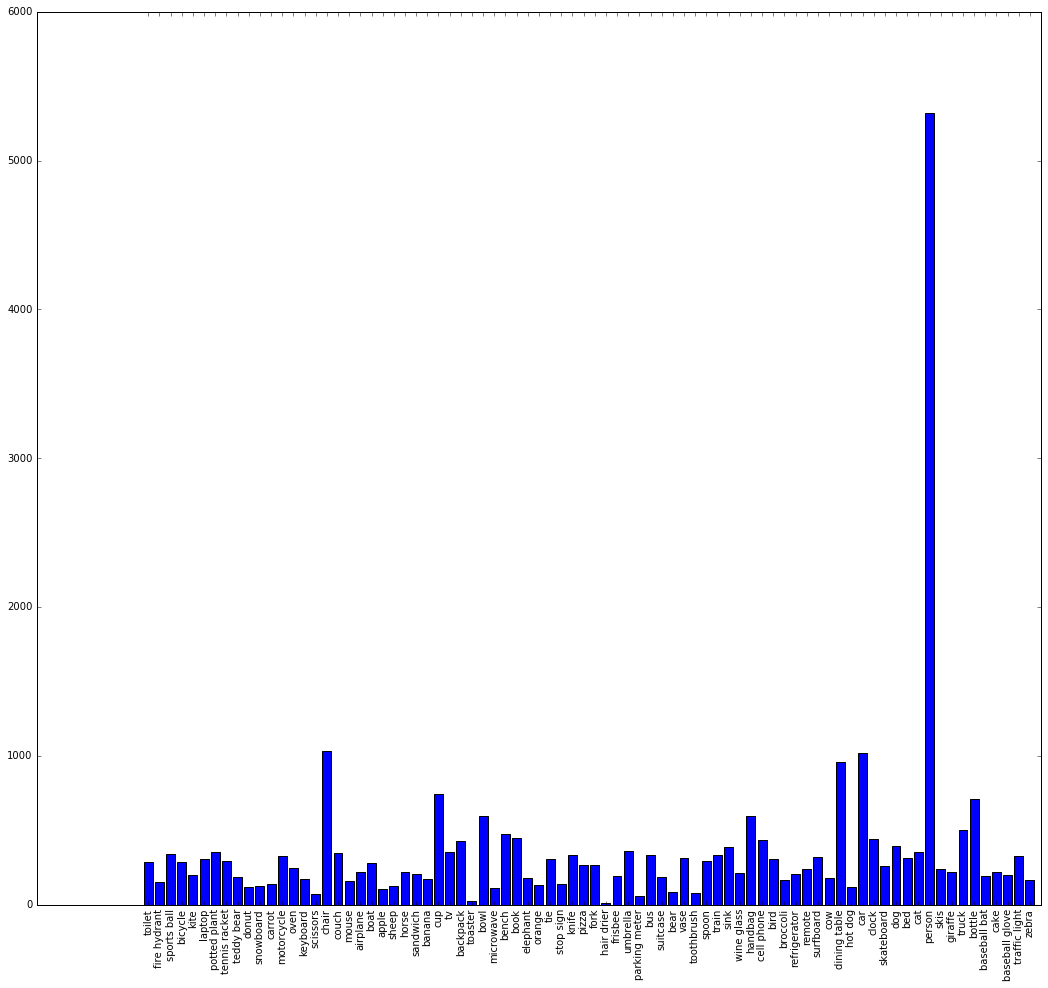

In [13]:
plotTagFrequency(tagDict)

The least frequent tags are easier to use in classification, whereas more frequent tags are harder to use to point to a specific image. This could help us understand which tags are more important than others when trying to determine the best tag out of a tie.

In [14]:
def plotTagNormalizeFrequency(d):
    newValues = [freq/float(sum(d.values())) for freq in list(d.values())]
    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.bar(range(len(d)), newValues, align='center')
    plt.xticks(range(len(d)), list(d.keys()), rotation=90)

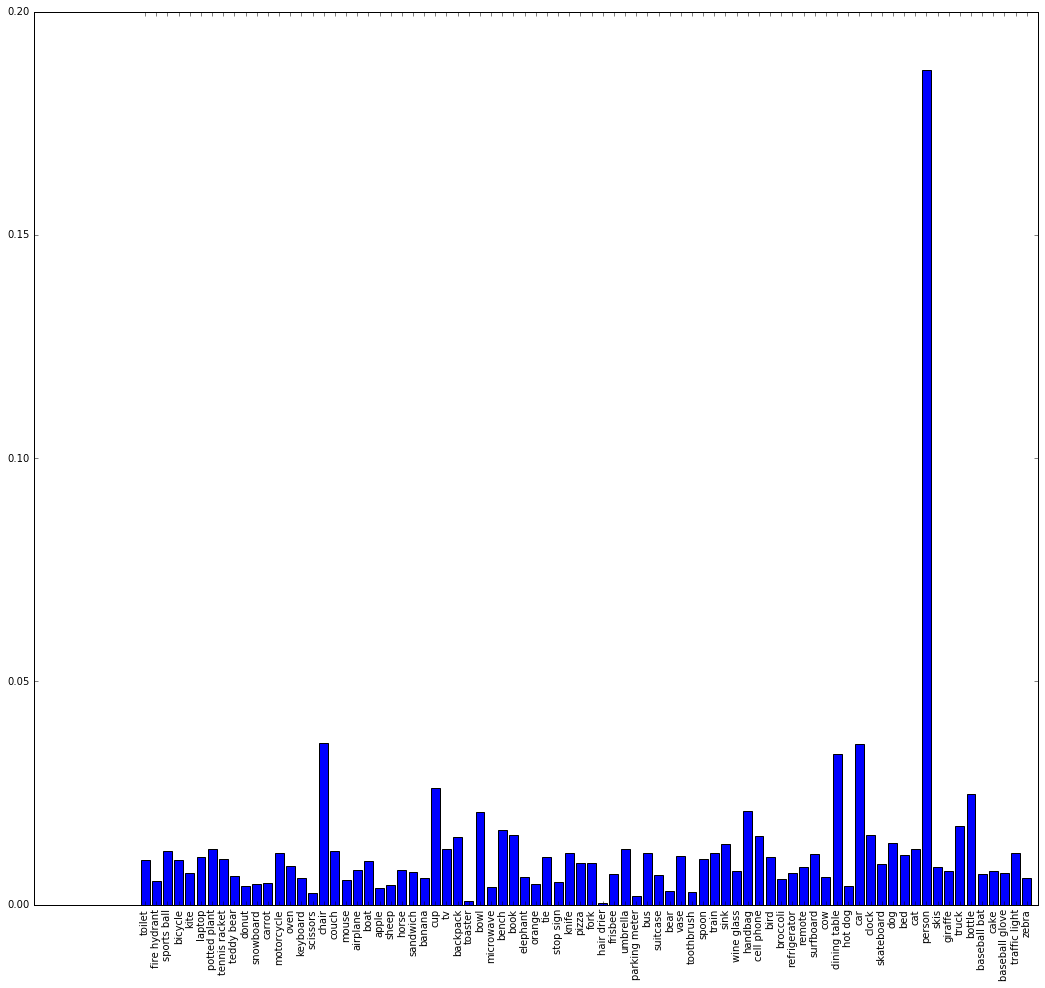

In [15]:
plotTagNormalizeFrequency(tagDict)

In [16]:
print tagDict['chair']/float(sum(tagDict.values()))

0.036167445784


## Generate Tag Vector

In [17]:
def createBag(num,tagFolder):
    tags = {}
    for n in range(num):
        f = tagFolder +"/" + str(n) + ".txt"
        fileTags = readTagsFile(f)
        #newTags = stemTags(fileTags) - maybe add stemming - Francesco
        for t in fileTags:
            if t not in tags.keys():
                tags[t] = 0
    return tags

def stemTags(lst):
    newTags = []
    for word in lst:
        stem = str(PorterStemmer().stem(word))
        newTags.append(stem)
    return newTags

def indexBag(bag):
    idx = 0
    for tag in bag.keys():
        bag[tag] = idx
        idx+=1
    return bag

def getTagVectors(num,tagFolder,indexedTagBag):
    tagVecs = np.zeros((num,len(indexedTagBag.keys()))) #2D Array of size (file number, len(indexedBagTag.keys))
    for n in range(num):
        f = tagFolder +"/" + str(n) + ".txt"
        fileTags = readTagsFile(f)
        #newTags = stemTags(fileTags) - maybe add stemming - Francesco
        for tag in fileTags:
            if tag in indexedTagBag.keys():
                tagVecs[n,indexedTagBag[tag]] = 1
            else:
                print str(tag) + " is not in the tag BOW"
    return pd.DataFrame(tagVecs,columns = indexedTagBag.keys())

In [18]:
tagBag = createBag(numTrain,tagsTrainFolder)
indexedTagBag = indexBag(tagBag)

In [19]:
tagVectors = getTagVectors(numTrain,tagsTrainFolder,indexedTagBag)
print tagVectors.shape

(10000, 80)




## Description Processing

In [20]:
def getStopWords():
    return set(stopwords.words("english"))

def lowerCase(x):
    return x.lower()

def lemmatize(lmt,x):
    return lmt.lemmatize(x)

def getPos(line):
    return pos_tag(line)

def tokenize(line):
    return line.split()

def stripPunctuation(s):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    return regex.sub(' ', s)

def stemmer(line):
    stemmer = PorterStemmer()
    stemmedLine = []
    for word,pos in getPos(line):
        stem = stemmer.stem(word)
        stemmedLine.append(stem)
    return stemmedLine 

def stemmedDescriptions(lst):
    stemmedDescriptions = []
    for line in lst:
        tokenizedLine = tokenize(line)
        stemmedDescriptions.append(stemmer(tokenizedLine))
    return stemmedDescriptions


In [21]:
def createBag(num,descFolder):
    bag = {}
    stopWords = getStopWords()
    for n in range(num):
        f = descFolder +"/" + str(n) + ".txt"
        fileDescriptions = readDescriptionFile(f) #2D Array
        stemDescriptions = stemmedDescriptions(fileDescriptions) #applying stemming so to aggregate similar words
        for desc in stemDescriptions:
            for word in desc:
                lowerWord = lowerCase(word)
                if str(lowerWord) not in bag.keys() and str(lowerWord) != "" and str(lowerWord) not in stopWords:
                    bag[str(lowerWord)] = 0 
    return bag

def indexBag(bag):
    idx = 0
    for tag in bag.keys():
        bag[tag] = idx
        idx+=1
    return bag

def binaryVectorizeDescriptions(num,descFolder,indexedDescBag):
    stopWords = getStopWords()
    featureVectorList = []
    for n in range(num):
        imageTagVec = [0.0 for tag in range(len(indexedDescBag.keys()))]
        f = descFolder +"/" + str(n) + ".txt"
        fileDescriptions = readDescriptionFile(f) #2D Array
        stemDescriptions = stemmedDescriptions(fileDescriptions) #applying stemming so to aggregate similar words
        for desc in stemDescriptions:
            for word in desc:
                lowerWord = lowerCase(word)
                if str(lowerWord) in indexedDescBag.keys() and str(lowerWord) != "" and str(lowerWord) not in stopWords:
                    imageTagVec[indexedDescBag[str(lowerWord)]] +=1.0
        featureVectorList.append(imageTagVec)
    return pd.DataFrame(featureVectorList,columns = indexedDescBag.keys())

def tfIdfVectorizeDecriptions(num,descFolder):
    """
    this technique will be very sparse - consider using dimensionality reduction here
    """
    tf = TfidfVectorizer(analyzer='word', 
                         ngram_range=(1,1), 
                         min_df = 1,
                         stop_words = 'english',
                         lowercase = True) #add norm="l1" or "l2" to normalize vectors
    descCorpus = []
    for n in range(num):
        f = descFolder +"/" + str(n) + ".txt"
        fileDescriptions = readDescriptionFile(f) #2D Array
        stemDescriptions = stemmedDescriptions(fileDescriptions) #applying stemming so to aggregate similar words
        for desc in stemDescriptions:
            descCorpus.append(" ".join(desc))
    return tf,tf.fit_transform(descCorpus) #TfIdfVectorizer uses unicode strings for column names.
    #return tf

In [22]:
descBag = createBag(numTrain,descriptionTrainFolder)
indexedDescBag = indexBag(descBag)

In [23]:
descVectors = binaryVectorizeDescriptions(numTrain,descriptionTrainFolder,indexedDescBag) #binary feature representation

In [24]:
print descVectors.shape

(10000, 6456)


In [25]:
normalizedDescVector = descVectors.div(descVectors.sum(axis=1), axis=0)

In [26]:
print normalizedDescVector.iloc[0]['tabl']

0.161290322581


In [25]:
#tfIDFObj,descTFIDF = tfIdfVectorizeDecriptions(numTrain,descriptionTrainFolder)

In [26]:
#print tfIDFObj.get_feature_names()

[u'00', u'05', u'10', u'103', u'106', u'11', u'12', u'12th', u'13th', u'142053', u'15', u'1802', u'1830', u'1917', u'1929', u'1932', u'1950', u'1960', u'1969', u'19th', u'1st', u'20', u'2013', u'23', u'238', u'25', u'29', u'2am', u'2x4', u'30', u'30th', u'31', u'32', u'35', u'360', u'38', u'39', u'3d', u'3rd', u'40', u'43', u'44', u'48', u'480', u'4pm', u'50', u'51', u'53', u'535', u'55', u'551', u'5th', u'600', u'6am', u'6pm', u'6th', u'747', u'75', u'750', u'7th', u'80', u'800', u'811', u'84', u'89', u'95th', u'aa', u'abandon', u'abdomen', u'abil', u'abl', u'abll', u'abnorm', u'aboard', u'abook', u'abou', u'abov', u'abraham', u'abreast', u'abstract', u'abund', u'abyss', u'acacia', u'academ', u'acceler', u'accent', u'accept', u'access', u'accessori', u'accid', u'accompani', u'account', u'accumul', u'ace', u'achiev', u'acket', u'acknowledg', u'aclock', u'acm', u'acorn', u'acrobat', u'act', u'action', u'activ', u'actor', u'actual', u'ad', u'add', u'addit', u'address', u'adjac', u'adjoin

In [27]:
#print descTFIDF.toarray().shape #toarray() converts this to a np array

(50194, 6344)


In [27]:
print "start"

start


In [28]:
# descTFIDFArray = descTFIDF.toarray()
# zeroColsIdx = np.where(~descTFIDFArray.any(axis=1))[0] #list of columns indices in descTFIDFArray that include all 0s.

In [79]:
def reduceDimensions(x,ncomp):
    #ncomp = number of components
    pca = PCA(ncomp)
    pca.fit(x)
    newX = pca.transform(x)
    return newX

In [ ]:
descPCAArray = reduceDimensions(descVectors,200) #PCA rray

In [ ]:
print descPCAArray.shape,descTFIDFArray.shape

## Classifiers

In [27]:
def SVM(train,trainLabel,test):
#     clf = SVC()
#     clf.fit(train,trainLabel)
#     preds = clf.predict(test)
    preds = OneVsRestClassifier(LinearSVC(random_state=0)).fit(train, trainLabel).predict(test)
    return preds

In [28]:
def logRegression(train,trainLabel,test,cVal):
    preds = OneVsRestClassifier(LogisticRegression(C=cVal,penalty="l1")).fit(train, trainLabel).predict(test)
    return preds

In [29]:
def randomForest(train,trainLabel,test):
    preds = OneVsRestClassifier(RandomForestClassifier()).fit(train, trainLabel).predict(test)
    return preds

In [30]:
def naiveBayes(train,trainLabel,test):
    preds = OneVsRestClassifier(BernoulliNB()).fit(train, trainLabel).predict(test)
    return preds

In [31]:
print descVectors.shape

(10000, 6456)


In [32]:
print list(descVectors)

['birdfeed', 'childern', 'woodi', 'yellow', 'four', 'wondrou', 'sunlit', 'digit', 'deli', 'fur', 'viewabl', 'prize', 'wooden', 'showcas', 'satchel', 'crotch', 'cheeto', 'rusti', 'rustl', 'bacon', 'histor', 'second', 'fece', 'tether', 'crouch', 'herb', 'herd', 'china', 'dogwood', 'dorm', 'strewn', 'personifi', 'militari', 'k', 'pastur', 'fumbl', 'sightse', 'climber', 'toowoomba', 'golden', 'brought', 'carb', 'remnant', 'stern', 'unit', 'spoke', 'geisha', 'overshadow', 'music', 'telegraph', 'passport', 'centr', 'strike', 'paperwork', 'relax', 'notif', 'notic', 'hurt', 'glass', 'hurl', 'hole', 'hold', 'unpack', 'accid', 'blade', 'locker', 'pidgeon', 'plunger', 'omelett', 'wand', 'edibl', 'household', 'swivel', 'charlton', 'caution', 'want', 'pinto', 'hog', 'hod', 'hoe', 'hon', 'travel', 'hot', 'hor', 'hop', 'cheetah', 'perspect', 'birdcag', 'wrong', 'beauti', 'sippi', 'vicin', 'speckl', 'revolv', 'tulip', 'wing', 'wind', 'wine', 'croqu', 'foodstuff', 'snugli', 'ewe', 'vari', 'wrought', 'f

In [33]:
print tagVectors.values[:3,10:12]

[[ 0.  0.]
 [ 0.  1.]
 [ 0.  0.]]


In [34]:
print tagVectors.values

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## Use kNN to find the 20 closest tag vectors for each test prediction vector

In [35]:
def kNN(tags,k,preds):
    model = NearestNeighbors(n_neighbors= k , algorithm='kd_tree').fit(tags)
    dist,idxs = model.kneighbors(preds)
    return dist,idxs

def MAP(i):
    score = (21 - i)/float(20)
    return score

In [64]:
def crossValidate(data,labels,classifier):
    """
    data = training data
    labels = training data labels
    algo = algorithmn that creates predictions
    """
    totalAvgMap = []
    totalAvgAcc = []
    kf =KFold(len(data),3)
    for trainIdx,testIdx in kf:
        mapScores=[]
        c = 0
        train = np.array([data[idx] for idx in trainIdx])
        test = np.array([data[idx] for idx in testIdx])
        trainLabels = np.array([labels[idx] for idx in trainIdx])
        testLabels = np.array([labels[idx] for idx in testIdx])
        testPreds = classifier(train,trainLabels,test,1)
        for i in range(len(testPreds)):
            if np.array_equal(testPreds[i],testLabels[i]):
                c+=1
        dist,kNNPreds = kNN(testLabels,20,testPreds)
        for i in range(len(kNNPreds)):
            if i in kNNPreds[i]:
                rankI = list(kNNPreds[i]).index(i)
                mapScores.append(MAP(rankI))
            else:
                mapScores.append(0)
        avgMAP = sum(mapScores)/float(len(mapScores))
        print "avgMAP: " + str(avgMAP)
        print "Accuracy: " + str(c/float(len(testPreds))) + " ,(" + str(c) + "/" + str(len(testPreds)) + ")"
        totalAvgMap.append(avgMAP)
        totalAvgAcc.append(c/float(len(testPreds)))
    print "Average MAP: " +str(np.array(totalAvgMap).mean())
    print "Average Accuracy: " + str(np.array(totalAvgAcc).mean())

In [79]:
def crossValidate2(data,labels,classifier):
    """
    data = training data
    labels = training data labels
    algo = algorithmn that creates predictions
    """
    totalAvgMap = []
    totalAvgAcc = []
    kf =KFold(len(data),3)
    for trainIdx,testIdx in kf:
        mapScores=[]
        c = 0
        train = np.array([data[idx] for idx in trainIdx])
        test = np.array([data[idx] for idx in testIdx])
        trainLabels = np.array([labels[idx] for idx in trainIdx])
        testLabels = np.array([labels[idx] for idx in testIdx])
        testPreds = classifier(train,trainLabels,test)
        for i in range(len(testPreds)):
            if np.array_equal(testPreds[i],testLabels[i]):
                c+=1
        dist,kNNPreds = kNN(testLabels,20,testPreds)
        for i in range(len(kNNPreds)):
            if i in kNNPreds[i]:
                rankI = list(kNNPreds[i]).index(i)
                mapScores.append(MAP(rankI))
            else:
                mapScores.append(0)
        avgMAP = sum(mapScores)/float(len(mapScores))
        print "avgMAP: " + str(avgMAP)
        print "Accuracy: " + str(c/float(len(testPreds))) + " ,(" + str(c) + "/" + str(len(testPreds)) + ")"
        totalAvgMap.append(avgMAP)
        totalAvgAcc.append(c/float(len(testPreds)))
    print "Average MAP: " +str(np.array(totalAvgMap).mean())
    print "Average Accuracy: " + str(np.array(totalAvgAcc).mean())
    return totalAvgMap,totalAvgAcc

In [38]:
## Naive Bayes
nbMap,nbAcc = crossValidate2(descVectors.values,tagVectors.values,naiveBayes)

avgMAP: 0.0640521895621
Accuracy: 0.0941811637672 ,(314/3334)
avgMAP: 0.0627512751275
Accuracy: 0.0954095409541 ,(318/3333)
avgMAP: 0.05799579958
Accuracy: 0.0828082808281 ,(276/3333)
Average MAP: 0.0615997547565
Average Accuracy: 0.0907996618498


In [39]:
nbMapNorm,nbAccNorm = crossValidate2(normalizedDescVector.values,tagVectors.values,naiveBayes)

avgMAP: 0.0640521895621
Accuracy: 0.0941811637672 ,(314/3334)
avgMAP: 0.0627512751275
Accuracy: 0.0954095409541 ,(318/3333)
avgMAP: 0.05799579958
Accuracy: 0.0828082808281 ,(276/3333)
Average MAP: 0.0615997547565
Average Accuracy: 0.0907996618498


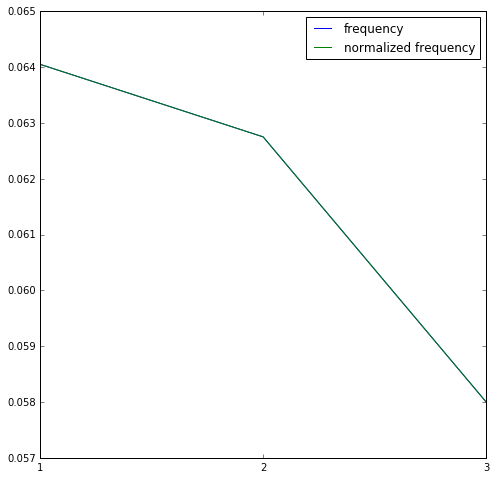

In [67]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
x1=plt.plot(range(3), nbMap, label="frequency")
x2=plt.plot(range(3),nbMapNorm,label = "normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend()


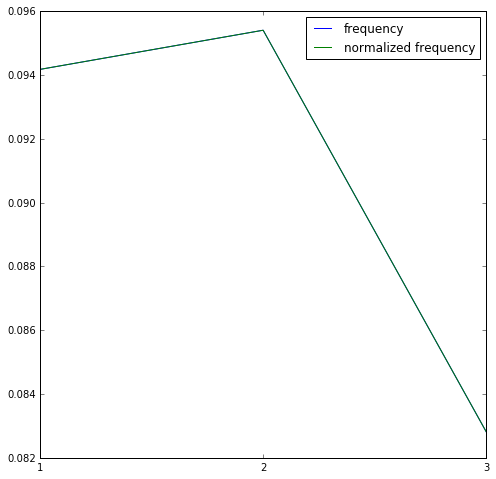

In [68]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(3), nbAcc,label="frequency")
plt.plot(range(3),nbAccNorm,label= "normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend()


In [47]:
svmMap,svmAcc = crossValidate2(descVectors.values,tagVectors.values,SVM)

avgMAP: 0.28074385123
Accuracy: 0.275944811038 ,(920/3334)
avgMAP: 0.307485748575
Accuracy: 0.281728172817 ,(939/3333)
avgMAP: 0.303495349535
Accuracy: 0.292229222922 ,(974/3333)
Average MAP: 0.29724164978
Average Accuracy: 0.283300735592


In [48]:
normsvmMap,normsvmAcc = crossValidate2(normalizedDescVector.values,tagVectors.values,SVM)

avgMAP: 0.251394721056
Accuracy: 0.387222555489 ,(1291/3334)
avgMAP: 0.263336333633
Accuracy: 0.403840384038 ,(1346/3333)
avgMAP: 0.263666366637
Accuracy: 0.395139513951 ,(1317/3333)
Average MAP: 0.259465807109
Average Accuracy: 0.395400817826


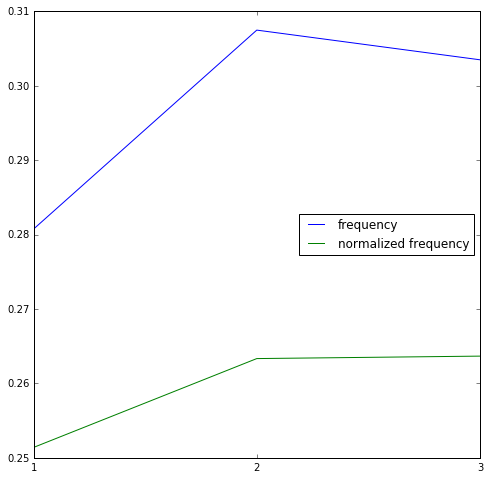

In [71]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(3), svmMap,label="frequency")
plt.plot(range(3),normsvmMap,label="normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend(loc = 5)

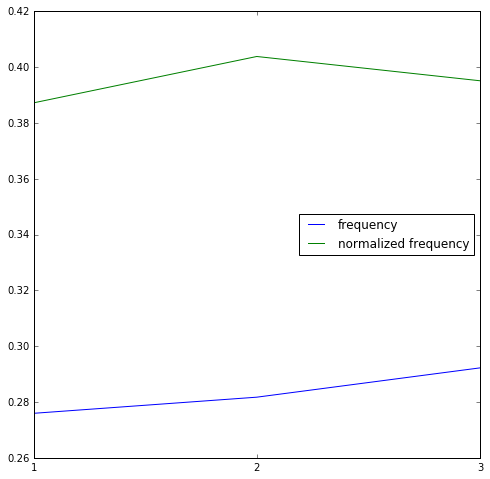

In [72]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(3), svmAcc,label="frequency")
plt.plot(range(3),normsvmAcc,label="normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend(loc = 5)

In [74]:
logMap,logAcc = crossValidate2(descVectors.values,tagVectors.values,logRegression)

avgMAP: 0.304964007199
Accuracy: 0.421115776845 ,(1404/3334)
avgMAP: 0.319846984698
Accuracy: 0.429642964296 ,(1432/3333)
avgMAP: 0.308280828083
Accuracy: 0.417941794179 ,(1393/3333)
Average MAP: 0.31103060666
Average Accuracy: 0.42290017844


In [75]:
normlogMap,normlogAcc = crossValidate2(normalizedDescVector.values,tagVectors.values,logRegression)

avgMAP: 0.070950809838
Accuracy: 0.139472105579 ,(465/3334)
avgMAP: 0.0677917791779
Accuracy: 0.140114011401 ,(467/3333)
avgMAP: 0.0678817881788
Accuracy: 0.141614161416 ,(472/3333)
Average MAP: 0.0688747923983
Average Accuracy: 0.140400092799


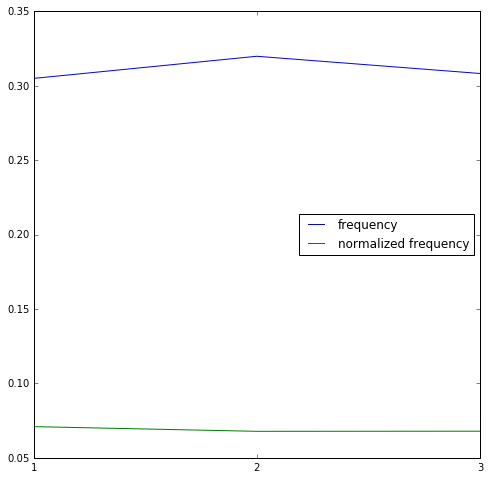

In [76]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(3), logMap,label="frequency")
plt.plot(range(3),normlogMap,label="normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend(loc = 5)

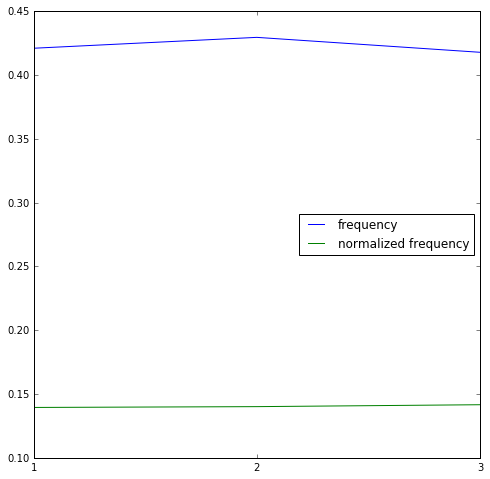

In [78]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(3), logAcc,label="frequency")
plt.plot(range(3),normlogAcc,label="normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend(loc = 5)

In [80]:
rfMap,rfAcc = crossValidate2(descVectors.values,tagVectors.values,randomForest)

avgMAP: 0.136907618476
Accuracy: 0.227054589082 ,(757/3334)
avgMAP: 0.158340834083
Accuracy: 0.252625262526 ,(842/3333)
avgMAP: 0.153255325533
Accuracy: 0.246324632463 ,(821/3333)
Average MAP: 0.149501259364
Average Accuracy: 0.242001494691


In [82]:
normrfMap,normrfAcc = crossValidate2(normalizedDescVector.values,tagVectors.values,randomForest)

avgMAP: 0.147855428914
Accuracy: 0.242351529694 ,(808/3334)
avgMAP: 0.146549654965
Accuracy: 0.234923492349 ,(783/3333)
avgMAP: 0.168571857186
Accuracy: 0.264626462646 ,(882/3333)
Average MAP: 0.154325647022
Average Accuracy: 0.247300494897


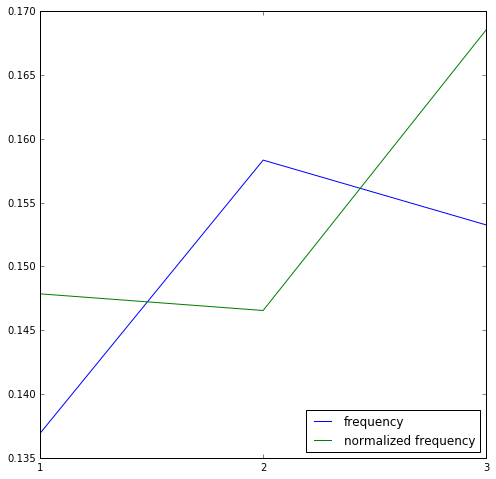

In [84]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(3), rfMap,label="frequency")
plt.plot(range(3),normrfMap,label="normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend(loc = 4)

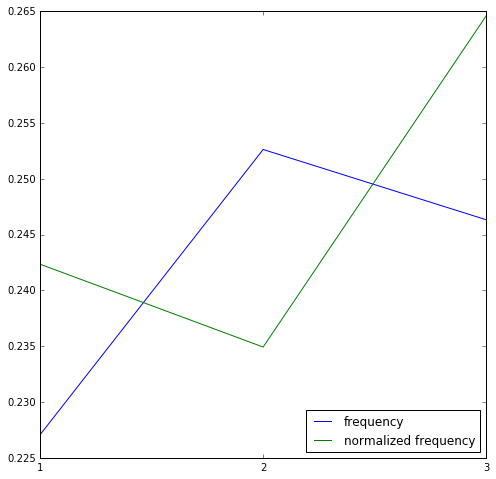

In [85]:
plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(3), rfAcc,label="frequency")
plt.plot(range(3),normrfAcc,label="normalized frequency")
plt.xticks(range(3), list([1,2,3]), rotation=0)
plt.legend(loc = 4)

In [65]:
print descVectors.values.shape,tagVectors.values.shape
crossValidate(descVectors.values,tagVectors.values,logRegression)

(10000, 4782) (10000, 80)
avgMAP: 0.305428914217
Accuracy: 0.392321535693 ,(1308/3334)
avgMAP: 0.326222622262
Accuracy: 0.410741074107 ,(1369/3333)
avgMAP: 0.318316831683
Accuracy: 0.396939693969 ,(1323/3333)
Average MAP: 0.316656122721
Average Accuracy: 0.400000767923


In [60]:
normalizedDescVector.iloc[0]

disarray     0
birdfeed     0
videogam     0
woodi        0
bookend      0
yellow       0
sleek        0
four         0
herslf       0
sleep        0
upsid        0
captain      0
hate         0
skeleton     0
trolley      0
educ         0
vandal       0
tricycl      0
sorri        0
swan         0
sunlit       0
clipboard    0
swat         0
bike         0
ziploc       0
hedg         0
worth        0
merchant     0
swivel       0
wreath       0
            ..
draught      0
snowsho      0
snoot        0
improv       0
postur       0
sherd        0
foil         0
sandwhich    0
preform      0
nintendo     0
veil         0
basketbal    0
cliff        0
ghost        0
droplet      0
pate         0
amp          0
tomot        0
baker        0
bathrob      0
fest         0
rule         0
hiker        0
tankini      0
portion      0
emerg        0
fifti        0
foothil      0
sash         0
buoy         0
Name: 0, dtype: float64

In [61]:
crossValidate(normalizedDescVector.values,tagVectors.values,logRegression)

avgMAP: 0.0942111577684
Accuracy: 0.180863827235 ,(603/3334)
avgMAP: 0.0935643564356
Accuracy: 0.193519351935 ,(645/3333)
avgMAP: 0.0934143414341
Accuracy: 0.189918991899 ,(633/3333)
Average MAP: 0.0937299518794
Average Accuracy: 0.18810072369


In [ ]:
#crossValidate(normalizedDescVector.values,tagVectors.values,naiveBayes)

In [62]:
def fineTuneLogRegression(C,data,labels):
    bestC = 0
    bestAcc = 0
    bestCMAP = 0
    bestMAP = 0
    for cVal in C:
        totalAvgMap = []
        totalAvgAcc = []
        kf = KFold(len(data),3)
        for trainIdx,testIdx in kf:
            mapScores=[]
            c = 0
            train = np.array([data[idx] for idx in trainIdx])
            test = np.array([data[idx] for idx in testIdx])
            trainLabels = np.array([labels[idx] for idx in trainIdx])
            testLabels = np.array([labels[idx] for idx in testIdx])
            testPreds = logRegression(train,trainLabels,test,cVal)
            for i in range(len(testPreds)):
                if np.array_equal(testPreds[i],testLabels[i]):
                    c+=1
            dist,kNNPreds = kNN(testLabels,20,testPreds)
            for i in range(len(kNNPreds)):
                if i in kNNPreds[i]:
                    rankI = list(kNNPreds[i]).index(i)
                    mapScores.append(MAP(rankI))
                else:
                    mapScores.append(0)
            avgMAP = sum(mapScores)/float(len(mapScores))
            acc = c/float(len(testPreds))
            print "avgMAP: " + str(avgMAP)
            print "Accuracy: " + str(acc) + " ,(" + str(c) + "/" + str(len(testPreds)) + ")"
            totalAvgMap.append(avgMAP)
            totalAvgAcc.append(acc)
            
            if acc > bestAcc:
                bestAcc = acc
                bestC = cVal
            if avgMAP > bestMAP:
                bestCMAP = cVal
                bestMAP = avgMAP
        print cVal
        print "Average MAP: " +str(np.array(totalAvgMap).mean())
        print "Average Accuracy: " + str(np.array(totalAvgAcc).mean())
        print
    print "The best C value was " + str(bestC) + "with an accuracy of " + str(bestAcc)
    print "The best C value was " + str(bestCMAP) + "with a MAP score of " + str(bestMAP)
    return bestC

In [63]:
bestC = fineTuneLogRegression([0.001, 0.01, 0.1, 1, 10, 100, 1000],descVectors.values,tagVectors.values)

avgMAP: 0.00557888422316
Accuracy: 0.0101979604079 ,(34/3334)
avgMAP: 0.00493549354935
Accuracy: 0.010201020102 ,(34/3333)
avgMAP: 0.00535553555356
Accuracy: 0.010501050105 ,(35/3333)
0.001
Average MAP: 0.00528997110869
Average Accuracy: 0.010300010205

avgMAP: 0.150389922016
Accuracy: 0.268146370726 ,(894/3334)
avgMAP: 0.153435343534
Accuracy: 0.27902790279 ,(930/3333)
avgMAP: 0.146744674467
Accuracy: 0.26402640264 ,(880/3333)
0.01
Average MAP: 0.150189980006
Average Accuracy: 0.270400225385

avgMAP: 0.277594481104
Accuracy: 0.393521295741 ,(1312/3334)
avgMAP: 0.293339333933
Accuracy: 0.404740474047 ,(1349/3333)
avgMAP: 0.285088508851
Accuracy: 0.390639063906 ,(1302/3333)
0.1
Average MAP: 0.285340774629
Average Accuracy: 0.396300277898

avgMAP: 0.305578884223
Accuracy: 0.392921415717 ,(1310/3334)
avgMAP: 0.326222622262
Accuracy: 0.410741074107 ,(1369/3333)
avgMAP: 0.318271827183
Accuracy: 0.396939693969 ,(1323/3333)
1
Average MAP: 0.316691111223
Average Accuracy: 0.400200727931

avgMA

## Generate  Test Description Vectors

In [66]:
testDescVectors = binaryVectorizeDescriptions(numTest,descriptionTestFolder,indexedDescBag)

In [67]:
normalizedTestDescVector = testDescVectors.div(testDescVectors.sum(axis=1), axis=0) 

## PCA

In [146]:
#trainTestDesc = pd.concat([descVectors,testDescVectors],axis=0)

In [147]:
#print trainTestDesc.shape

(12000, 6456)


In [ ]:
#PCATrainTestDesc = reduceDimensions(trainTestDesc.values,500)

## Run classifiers on test data

In [128]:
print normalizedDescVector.shape,tagVectors.shape,normalizedTestDescVector.shape

(10000, 6456) (10000, 80) (2000, 6456)


In [68]:
testPreds = logRegression(descVectors.values,tagVectors.values,testDescVectors.values,0.1)

In [69]:
print testPreds.shape

(2000, 80)


In [70]:
print testPreds[:50]

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]]


## Generate Test Tag Vectors¶

In [71]:
testTagVectors = getTagVectors(numTest,tagsTestFolder,indexedTagBag)

## Run kNN on test data

In [72]:
dist,preds = kNN(testTagVectors,20,testPreds)

In [73]:
print preds

[[1862 1698  292 ...,  302  152  255]
 [1907 1929  589 ..., 1071 1141 1999]
 [ 445 1866 1840 ..., 1027 1030  953]
 ..., 
 [1535 1218  897 ...,   12   52   63]
 [1660 1135 1429 ...,   12   64   75]
 [1342  653 1430 ...,  346  405  976]]


In [74]:
preds[:5]

array([[1862, 1698,  292,  124,  359, 1479, 1743, 1131,  942,   36, 1231,
         364,  465,  281,   50,  381,  388,  302,  152,  255],
       [1907, 1929,  589,  833, 1753,  758,  314, 1219,  687,  130,  378,
         348,  457, 1114, 1156,  820, 1341, 1071, 1141, 1999],
       [ 445, 1866, 1840, 1124, 1724,  649, 1665,  184,  327,  763,  598,
         720,  860,  934, 1059, 1089,  607, 1027, 1030,  953],
       [1513,  799, 1922, 1486, 1865,  800, 1035,   75,  836,  397,  654,
         469,   90,  897,  930, 1135, 1218,  686,   66,  417],
       [  36,  292, 1743,  359, 1131, 1231,  942,  152,   95,  255,  949,
          50,  388,  484,  141,  897,  311,  760,  250,  594]])

## Save Results

In [75]:
def saveResults(res,name):
    f = open(name,'w')
    f.write('Descritpion_ID,Top_20_Image_IDs\n')
    for i in xrange(2000):
        f.write(str(i)+'.txt,')
        for j in xrange(20):
            if j == 19:
                f.write(str(res[i,j])+'.jpg\n')
            else:
                f.write(str(res[i,j])+'.jpg ')
    f.close()

In [76]:
saveResults(preds,"1LogRegressionPOS+kNN.csv")

In [101]:
"""

Rankings:
1) Logistic Regression (on non normalized description vectors)
2) SVM(linear) (on normalized description vectors)
3) Random Forest
4) Naive Bayes
5)

"""

'\nRankings:\n'